In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [108]:
!dir data

 O volume na unidade C não tem nome.
 O Número de Série do Volume é D8D6-4768

 Pasta de C:\Users\braian.dias\datascience\machine-learning\projects\capstone\home_credit\data

13/08/2018  17:06    <DIR>          .
13/08/2018  17:06    <DIR>          ..
13/08/2018  17:06        26.567.651 application_test.csv
13/08/2018  17:06       166.133.370 application_train.csv
13/08/2018  17:06       170.016.717 bureau.csv
13/08/2018  17:06       375.592.889 bureau_balance.csv
13/08/2018  17:06       424.582.605 credit_card_balance.csv
13/08/2018  17:06            37.383 HomeCredit_columns_description.csv
13/08/2018  17:05       723.118.349 installments_payments.csv
13/08/2018  17:06       392.703.158 POS_CASH_balance.csv
13/08/2018  17:06       404.973.293 previous_application.csv
13/08/2018  17:06           536.202 sample_submission.csv
              10 arquivo(s)  2.684.261.617 bytes
               2 pasta(s)   181.560.008.704 bytes disponíveis


In [113]:
app_train = pd.read_csv("data/application_train.csv")
app_test = pd.read_csv("data/application_test.csv")
POS_CASH_balance = pd.read_csv("data/POS_CASH_balance.csv")
credit_card_balance = pd.read_csv("data/credit_card_balance.csv")

In [114]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [111]:
print(app_train.shape)
print(app_test.shape)
print(POS_CASH_balance.shape)

POS_CASH_balance.head()
#app_test.head()

(307511, 122)
(48744, 121)
(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## Distribution of target data

It seems that data is skewed, we have much more label 0 than label 1

Number of training instances with TARGET 0 : 282686
Number of training instances with TARGET 1 : 24825


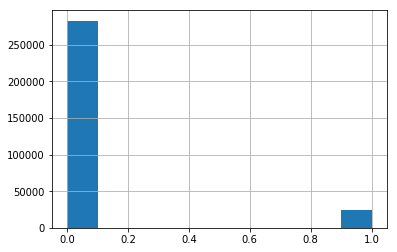

In [24]:
app_train['TARGET'].hist()
print('Number of training instances with TARGET 0 : {}'.format(app_train[app_train['TARGET']<=0].shape[0]))
print('Number of training instances with TARGET 1 : {}'.format(app_train[app_train['TARGET']>0].shape[0]))

## Feature analysis

In [35]:
non_numerical_features = [col for col in app_train.columns if app_train[col].dtype == 'object']
numerical_features     = [col for col in app_train.columns if app_train[col].dtype != 'object']
len(non_numerical_features+numerical_features)

### Numerical features

** TODO: ** 
* null replacement strategy (mean?, mode?)
* Normalization


In [98]:
app_train[numerical_features[0:50]].info()
app_train[numerical_features[0:50]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
REGION_POPULATION_RELATIVE      307511 non-null float64
DAYS_BIRTH                      307511 non-null int64
DAYS_EMPLOYED                   307511 non-null int64
DAYS_REGISTRATION               307511 non-null float64
DAYS_ID_PUBLISH                 307511 non-null int64
OWN_CAR_AGE                     104582 non-null float64
FLAG_MOBIL                      307511 non-null int64
FLAG_EMP_PHONE                  307511 non-null int64
FLAG_WORK_PHONE                 307511 non-null int64
FLAG_CONT_M

In [104]:
app_train[numerical_features[50:]].info()
app_train[numerical_features[50:]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 56 columns):
COMMONAREA_MODE                 92646 non-null float64
ELEVATORS_MODE                  143620 non-null float64
ENTRANCES_MODE                  152683 non-null float64
FLOORSMAX_MODE                  154491 non-null float64
FLOORSMIN_MODE                  98869 non-null float64
LANDAREA_MODE                   124921 non-null float64
LIVINGAPARTMENTS_MODE           97312 non-null float64
LIVINGAREA_MODE                 153161 non-null float64
NONLIVINGAPARTMENTS_MODE        93997 non-null float64
NONLIVINGAREA_MODE              137829 non-null float64
APARTMENTS_MEDI                 151450 non-null float64
BASEMENTAREA_MEDI               127568 non-null float64
YEARS_BEGINEXPLUATATION_MEDI    157504 non-null float64
YEARS_BUILD_MEDI                103023 non-null float64
COMMONAREA_MEDI                 92646 non-null float64
ELEVATORS_MEDI                  143620 non-null float6

,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007200,0.000000,0.069000,0.166700,0.083300,0.016600,0.054200,0.042700,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.019000,0.000000,0.137900,0.166700,0.208300,0.045800,0.077100,0.073100,0.000000,0.001100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.049000,0.120800,0.206900,0.333300,0.375000,0.084100,0.131300,0.125200,0.003900,0.023100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Non-numerical features

** TODO: ** 
* null replacement strategy
* aggregate discrete variables with too many levels


In [37]:
app_train[non_numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
OCCUPATION_TYPE               211120 non-null object
WEEKDAY_APPR_PROCESS_START    307511 non-null object
ORGANIZATION_TYPE             307511 non-null object
FONDKAPREMONT_MODE            97216 non-null object
HOUSETYPE_MODE                153214 non-null object
WALLSMATERIAL_MODE            151170 non-null object
EMERGENCYSTATE_MODE           161756 non-null object
dtypes: object(16)
memory usage: 37.5+ MB


In [93]:
app_train[non_numerical_features].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


null values in NAME_TYPE_SUITE : 1292
not null values in NAME_TYPE_SUITE : 306219

List of values for NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object


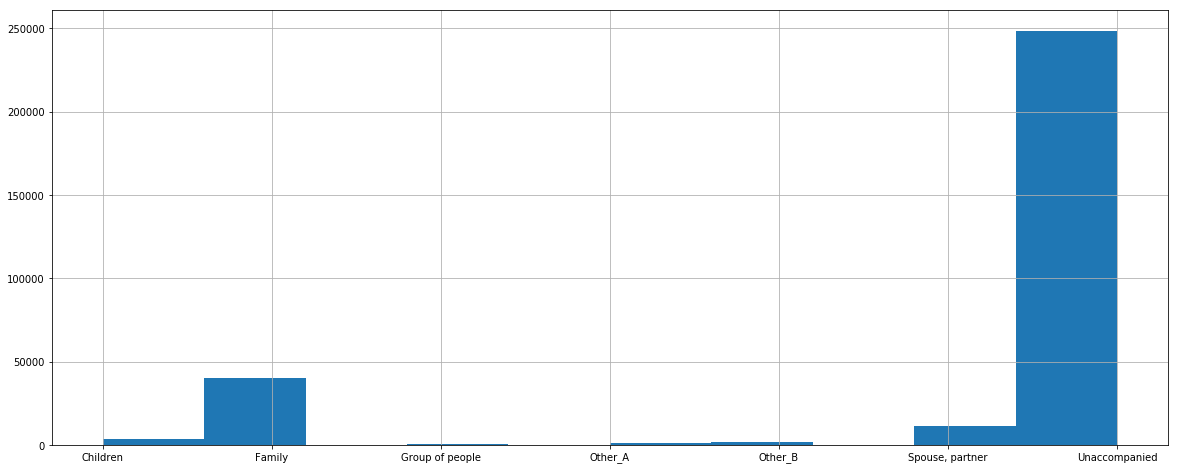

In [91]:
col_name = 'NAME_TYPE_SUITE'

print('null values in {} : {}'.format(col_name,app_train.loc[app_train[col_name].isnull()==True,col_name].size))
print('not null values in {} : {}\n'.format(col_name,app_train.loc[app_train[col_name].isnull()==False,col_name].size))
print('List of values for {} : {}\n'.format(col_name,app_train[col_name].unique()))

print(app_train[col_name].describe())

app_train[col_name].hist(figsize=(20,8))

null values in OCCUPATION_TYPE : 96391
not null values in OCCUPATION_TYPE : 211120

List of values for OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object


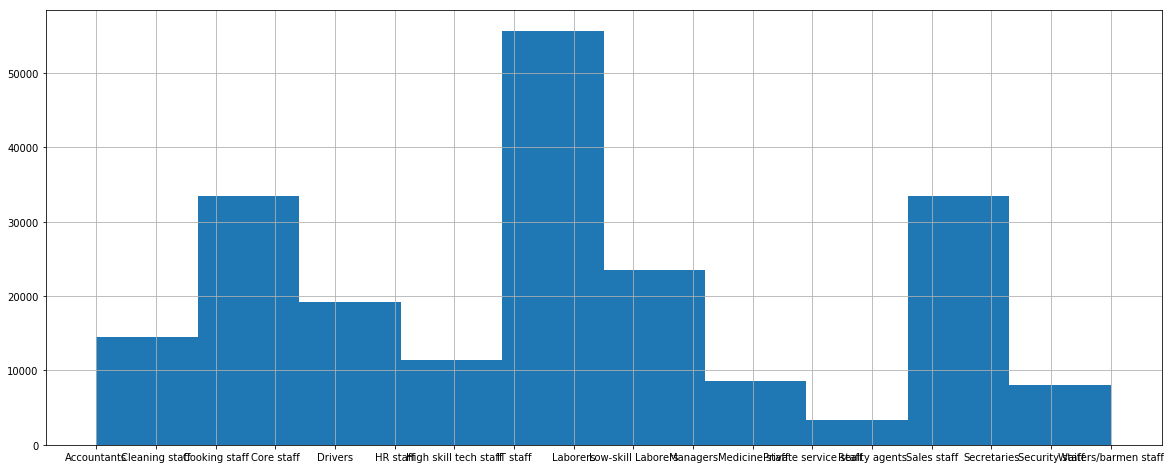

In [92]:
col_name = 'OCCUPATION_TYPE'

print('null values in {} : {}'.format(col_name,app_train.loc[app_train[col_name].isnull()==True,col_name].size))
print('not null values in {} : {}\n'.format(col_name,app_train.loc[app_train[col_name].isnull()==False,col_name].size))
print('List of values for {} : {}\n'.format(col_name,app_train[col_name].unique()))

print(app_train[col_name].describe())

app_train[col_name].hist(figsize=(20,8))

null values in WALLSMATERIAL_MODE : 156341
not null values in WALLSMATERIAL_MODE : 151170

List of values for WALLSMATERIAL_MODE : ['Stone, brick' 'Block' nan 'Panel' 'Mixed' 'Wooden' 'Others' 'Monolithic']

count     151170
unique         7
top        Panel
freq       66040
Name: WALLSMATERIAL_MODE, dtype: object


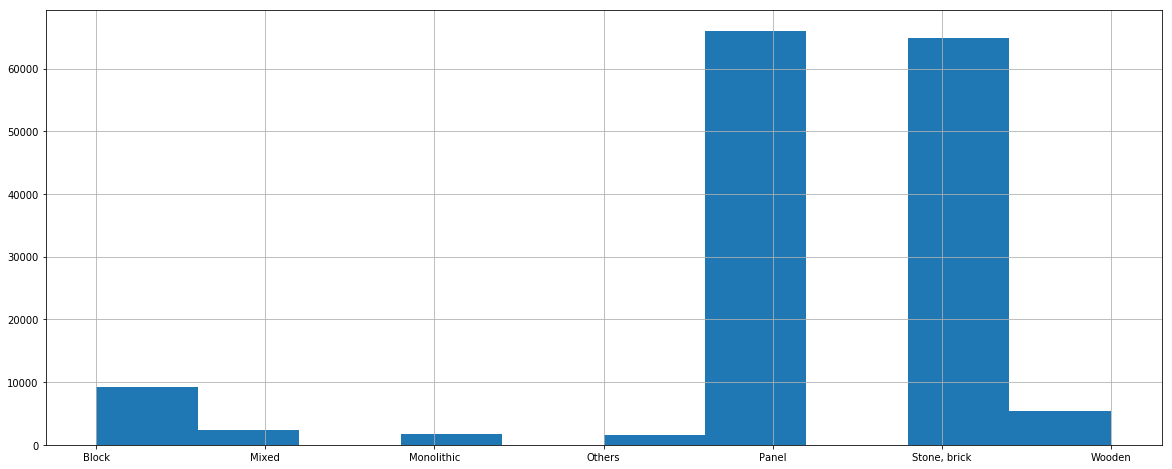

In [95]:
col_name = 'WALLSMATERIAL_MODE'

print('null values in {} : {}'.format(col_name,app_train.loc[app_train[col_name].isnull()==True,col_name].size))
print('not null values in {} : {}\n'.format(col_name,app_train.loc[app_train[col_name].isnull()==False,col_name].size))
print('List of values for {} : {}\n'.format(col_name,app_train[col_name].unique()))

print(app_train[col_name].describe())

app_train[col_name].hist(figsize=(20,8))

null values in ORGANIZATION_TYPE : 0
not null values in ORGANIZATION_TYPE : 307511

List of values for ORGANIZATION_TYPE : ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: type 12' 'Mobile'
 'Trade: type 1' 'Industry: type 5' 'Industry: type 10' 'Legal Services'
 'Advertising' 'Trade: type 5' 'Cleaning' 'Industry: type 13'
 'Trade: type 4' 'Telecom' 'Industry: type 8' 'Realtor' 'Ind

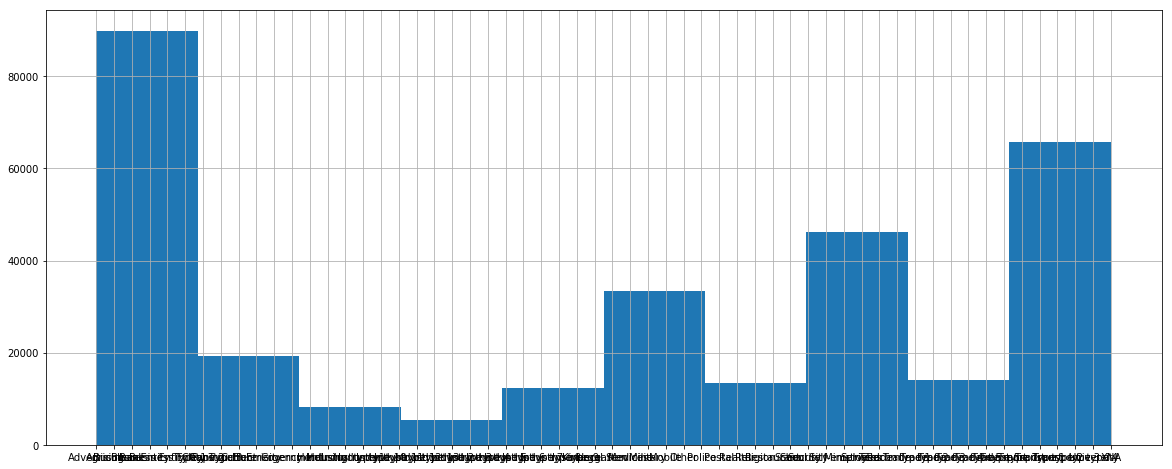

In [96]:
col_name = 'ORGANIZATION_TYPE'

print('null values in {} : {}'.format(col_name,app_train.loc[app_train[col_name].isnull()==True,col_name].size))
print('not null values in {} : {}\n'.format(col_name,app_train.loc[app_train[col_name].isnull()==False,col_name].size))
print('List of values for {} : {}\n'.format(col_name,app_train[col_name].unique()))

print(app_train[col_name].describe())

app_train[col_name].hist(figsize=(20,8))